<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_P3_2024_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Avaliação P3**: Regressão e Classificação, Métricas e CV

Explore os dados abaixo e a seguir implemente modelos de regressão e classificação.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
path = 'https://github.com/Rogerio-mack/IMT_CD_2024/raw/refs/heads/main/data/'

In [ ]:
df = pd.read_csv(path + 'credit_card_data.csv')
print("Dados para o aprendizado do modelo...")
display(df.head())
print()

df_case_regression = pd.read_csv(path + 'credit_card_data_case_regression.csv')
print("Dados para predição de `expenditure`")
display(df_case_regression.head())
print()

df_case_classification = pd.read_csv(path + 'credit_card_data_case_classification.csv')
print("Dados para predição de `card`")
display(df_case_classification.head())
print()

Dados para o aprendizado do modelo...


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,client_name,sex
0,yes,0,37,4.52,0.03,124.98,yes,no,3,54,1,12,Ivan Gomez,Male
1,yes,0,33,2.42,0.01,9.85,no,no,3,34,1,13,Sean Williams,Not Declared
2,yes,0,33,4.50,0.00,15.00,yes,no,4,58,1,5,William Beard,Male
3,yes,0,30,2.54,0.07,137.87,no,no,0,25,1,7,Cynthia Cuevas,Female
4,yes,0,32,9.79,0.07,546.50,yes,no,2,64,1,5,Julie Davis,Female



Dados para predição de `expenditure`


,card,reports,age,income,share,owner,selfemp,dependents,months,majorcards,active,client_name,sex
0,yes,0,32,3.37,0.07,no,no,0,55,0,6,Christopher Huffman,Male
1,yes,0,25,2.24,0.00,no,no,0,12,1,2,Jennifer Mitchell,Female
2,yes,1,46,5.50,0.18,no,no,3,143,1,16,James Massey,Male



Dados para predição de `card`


,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,client_name,sex
0,0,32,3.37,0.07,185.06,no,no,0,55,0,6,Joseph Reid,Male
1,0,25,2.24,0.00,4.58,no,yes,0,12,1,2,Lindsey Gonzales,Not Declared
2,0,41,1.98,0.00,2.20,yes,no,2,36,1,0,Linda Berkeley,Female


# Exercício 1. Regressão.

Faça um modelo de regressão para estimar novos valores de `expenditure` a partir dos **demais atributos preditores** que sejam **significativos**. Começe o modelo de regressão selecinando todos os atributos preditores e depois selecione somente os significativos. Para atributos categóricos considere significativos **somente atributos em que todos os encodes forem significativos**.



## 1.1. Qual o $R2$ obtido com todos os atributos preditores **significativos**?



In [ ]:
g


                            OLS Regression Results                            
Dep. Variable:            expenditure   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     433.9
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:50:53   Log-Likelihood:                -8163.6
No. Observations:                1319   AIC:                         1.636e+04
Df Residuals:                    1305   BIC:                         1.643e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -180.9502    

In [ ]:
p_values = results.pvalues

significant_variables = p_values[p_values < 0.05]

print(significant_variables)


Intercept       7.268662e-29
sex[T.Male]     3.556041e-02
income         2.128451e-101
share           0.000000e+00
months          1.365730e-02
dtype: float64


In [ ]:
import statsmodels.formula.api as sm

formula = 'expenditure ~ ' + ' + '.join(['income', 'share', 'months'])

model = sm.ols(formula=formula, data=df)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            expenditure   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     1874.
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:50:53   Log-Likelihood:                -8169.5
No. Observations:                1319   AIC:                         1.635e+04
Df Residuals:                    1315   BIC:                         1.637e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -155.5281      8.018    -19.397      0.0

## 1.2. Qual a predição de despesas (`expenditure`) dos clientes **Jennifer Mitchell** e **James Massey**?

In [ ]:
df_case_regression['expenditure_prev'] = results.predict(df_case_regression)
display(df_case_regression[['client_name','expenditure_prev']])

,client_name,expenditure_prev
0,Christopher Huffman,188.992595
1,Jennifer Mitchell,-38.112900
2,James Massey,562.533503


## 1.3 Você pode notar que previsão de despesas para **Jennifer Mitchell** foi negativa. Como você pode corrigir isso? Qual a nova predição de despesas para Jennifer Mitchell?

In [ ]:
formula = 'expenditure ~ ' + ' + '.join(['income', 'share', 'months']) + '-1'

model = sm.ols(formula=formula, data=df)
results = model.fit()

print(results.summary())

df_case_regression['expenditure_prev'] = results.predict(df_case_regression)
display(df_case_regression[['client_name','expenditure_prev']])

                                 OLS Regression Results                                
Dep. Variable:            expenditure   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.833
Method:                 Least Squares   F-statistic:                              2193.
Date:                Tue, 24 Sep 2024   Prob (F-statistic):                        0.00
Time:                        17:50:53   Log-Likelihood:                         -8335.4
No. Observations:                1319   AIC:                                  1.668e+04
Df Residuals:                    1316   BIC:                                  1.669e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,client_name,expenditure_prev
0,Christopher Huffman,214.394496
1,Jennifer Mitchell,47.818937
2,James Massey,477.279355


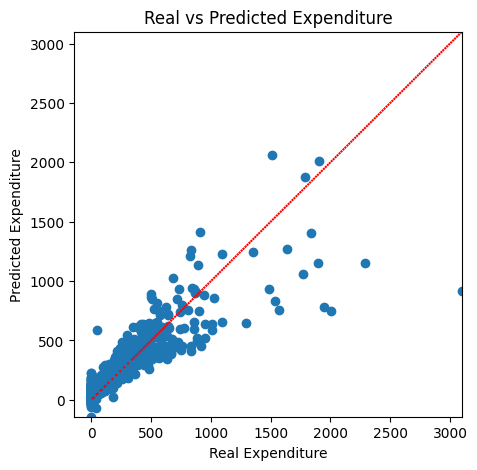

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))

plt.scatter(df['expenditure'],results.predict(df))

plt.xlabel('Real Expenditure')
plt.ylabel('Predicted Expenditure')
plt.plot(df['expenditure'],df['expenditure'],'r:')
plt.xlim(min(df['expenditure'].min(),results.predict(df).min()),max(df['expenditure'].max(),results.predict(df).max()))
plt.ylim(min(df['expenditure'].min(),results.predict(df).min()),max(df['expenditure'].max(),results.predict(df).max()))

plt.title('Real vs Predicted Expenditure')
plt.show()

# Exercício 2. Classificação.

Empregue todos atributos preditores implementar modelos de regressão logística e K-vizinhos mais próximos de classificação para a classe `card`.




## Preparação dos dados

Atribua a variável alvo e variáveis preditoras. Abaixo você encontra os códigos para o hotencode e normalização dos dados. Para os conjuntos de treinamento e teste, basta executar. Os estimadores devem ser empregados por você mais adiante nas predições.



In [ ]:
%%script echo skipping
from sklearn.model_selection import train_test_split

X = ...
y = ...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

skipping


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['card','client_name'], axis=1)
y = df['card']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# print("Before encode...")
# display(X_train.head())
# print()
categorical_cols = X_train.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(X_train[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

X_train= pd.concat([X_train.drop(columns=categorical_cols), encoded_df], axis=1)

# print("Before encode...")
# display(X_train.head())

# print("Before encode...")
# display(X_test.head())
# print()

encoded_data = encoder.transform(X_test[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

X_test= pd.concat([X_test.drop(columns=categorical_cols), encoded_df], axis=1)

# print("Before encode...")
# display(X_test.head())

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_data, columns=X_train.columns)

scaled_data = scaler.transform(X_test)
X_test = pd.DataFrame(scaled_data, columns=X_test.columns)

display(X_train.head())
display(X_test.head())

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_yes,selfemp_yes,sex_Male,sex_Not Declared
0,-0.331886,-0.844434,-0.879678,2.066103,0.925118,-0.808101,-0.546106,0.474896,-0.152098,-0.882483,-0.26957,0.741726,-0.251875
1,-0.331886,-0.450451,0.334975,0.107760,0.236472,-0.808101,-0.114360,0.474896,0.486648,-0.882483,-0.26957,-1.348208,-0.251875
2,-0.331886,-0.253460,-0.138739,-0.716805,-0.697901,0.783955,-0.650321,-2.105722,-0.311784,-0.882483,-0.26957,0.741726,-0.251875
3,-0.331886,-3.208332,-0.211619,-0.716805,-0.697901,-0.808101,-0.560994,-2.105722,-0.790843,-0.882483,-0.26957,0.741726,-0.251875
4,-0.331886,0.633002,-0.995070,0.210831,-0.200627,-0.808101,0.242946,0.474896,-1.110215,-0.882483,-0.26957,-1.348208,-0.251875


,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_yes,selfemp_yes,sex_Male,sex_Not Declared
0,-0.331886,-0.056468,-0.934337,-0.201452,-0.392186,-0.808101,-0.694984,0.474896,2.402883,1.133166,-0.26957,-1.348208,-0.251875
1,-0.331886,-0.942930,-0.818945,0.313902,-0.071382,-0.808101,-0.694984,0.474896,-1.110215,-0.882483,-0.26957,0.741726,-0.251875
2,-0.331886,0.337515,-0.211619,-0.407593,-0.394476,1.579983,1.165989,-2.105722,-0.471470,1.133166,-0.26957,-1.348208,-0.251875
3,-0.331886,-0.548947,2.217687,0.416972,1.722700,-0.808101,-0.828974,0.474896,0.965706,1.133166,-0.26957,0.741726,-0.251875
4,-0.331886,1.617959,-0.144813,-0.613734,-0.617343,-0.012073,1.463745,-2.105722,-0.152098,1.133166,-0.26957,0.741726,-0.251875


In [ ]:
#@markdown **Just sanity check**, must be **True, True**
print(X_train.sum().sum() == -3.1663560662309465e-13)
print(X_test.sum().sum() == 0.5097438881799405)

True
True


## Seleção do Modelos

## 2.1. Obtenha a acuracidade média dos modelos de regressão logística (`max_iter=1000`) e de K-Vizinhos mais próximos para $k=3,4,5$ e $6$ para 5 partições de *cross-validation* como abaixo. Qual modelo apresenta maior acurácia média?

```
KFold(n_splits=5, shuffle=True, random_state=1)
```



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, StratifiedKFold, KFold

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN k=3': KNeighborsClassifier(3),
    'KNN k=4': KNeighborsClassifier(4),
    'KNN k=5': KNeighborsClassifier(5),
    'KNN k=6': KNeighborsClassifier(6)
}

kf = KFold(n_splits=5, shuffle=True, random_state=1)

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=kf)
    print(f"{name}, score = {scores.mean():.4f}")

LogisticRegression, score = 0.9393
KNN k=3, score = 0.8372
KNN k=4, score = 0.8372
KNN k=5, score = 0.8463
KNN k=6, score = 0.8473


## 2.2. Qual a acurácia do melhor modelo sobre o conjunto de teste e o número de falsos negativos para a classe `card = no`?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo:  {accuracy:.4f}")

Acurácia do modelo:  0.9636


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", confusion)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Matriz de Confusão:
 [[ 72   4]
 [  8 246]]
Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.95      0.92        76
         yes       0.98      0.97      0.98       254

    accuracy                           0.96       330
   macro avg       0.94      0.96      0.95       330
weighted avg       0.96      0.96      0.96       330



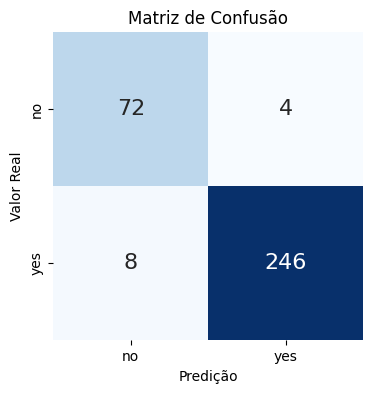

In [ ]:
cm = confusion_matrix(y_test, y_pred)

class_names = model.classes_

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d',  cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 16})
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.show()

## 2.3. Novamente, considere o modelo de maior acurácia, dentre os modelos avaliados. Qual a predição de `card` nos casos de `df_case_classification`?  

In [ ]:
X_new = df_case_classification.drop(['client_name'],axis=1)

categorical_cols = X_new.select_dtypes(include=['object']).columns
encoded_data = encoder.transform(X_new[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

X_new = pd.concat([X_new.drop(columns=categorical_cols), encoded_df], axis=1)
X_new = pd.DataFrame(scaler.transform(X_new), columns=X_new.columns)

df_case_classification['card'] = model.predict(X_new)
display(df_case_classification[['client_name','card']])



,client_name,card
0,Joseph Reid,yes
1,Lindsey Gonzales,no
2,Linda Berkeley,no


## 2.4. Qual o maior valor de AUC (sobre o conjunto de teste) dentre os modelos avaliados?  

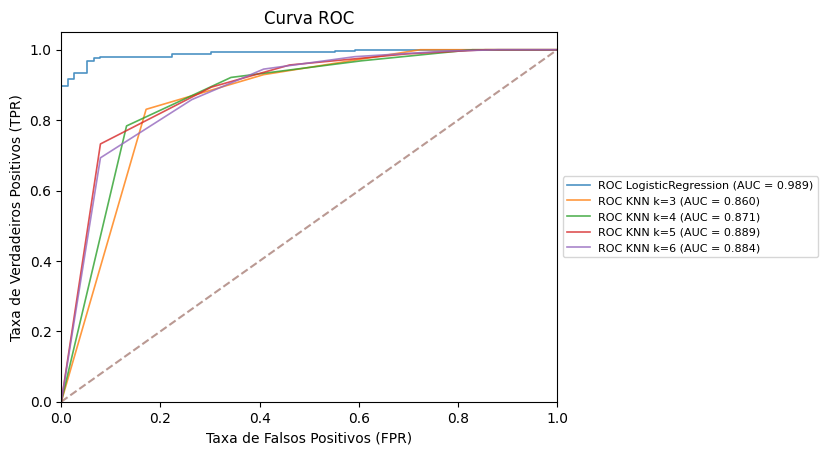

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_train = y_train == 'yes'
y_test = y_test == 'yes'

for name, model in models.items():

  model.fit(X_train, y_train)

  y_prob = model.predict_proba(X_test)[:, 1]

  fpr, tpr, thresholds = roc_curve(y_test, y_prob)

  roc_auc = auc(fpr, tpr)

  plt.plot(fpr, tpr, label=f'ROC {name} (AUC = {roc_auc:.3f})', alpha=0.8,lw=1.2)

plt.plot([0, 1], [0, 1], linestyle='--', alpha=0.6)
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')

plt.legend(fontsize=8,loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
